In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Nueva sección

In [1]:
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librería machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

from pylab import rcParams

# Librería para datos no balanceados
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

%matplotlib inline

In [2]:
df = pd.read_excel('EstudioPrevalencia2015.xlsx', 1)

In [3]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


In [4]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return None
    else :
      return x

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2.0
    else :
      return x

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

  new_df = new_df.dropna(axis=1, how='any')
  print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

  return new_df

In [5]:
new_df = cleanDataset(df)
new_df.columns

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminados los valores de 99 o 100 (5159, 240)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 240)
Eliminadas todas las columnas con al menos un valor nulo (5159, 127)
Eliminadas columnas que no aportan valor  (5159, 125)


Index(['P0R1', 'P0B', 'POB1', 'P0B2', 'P0C', 'P0F1', 'POF2', 'P1P1A', 'P1P1B',
       'P1P1C',
       ...
       'DB0', 'DB1', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'PESO',
       'PESO1'],
      dtype='object', length=125)

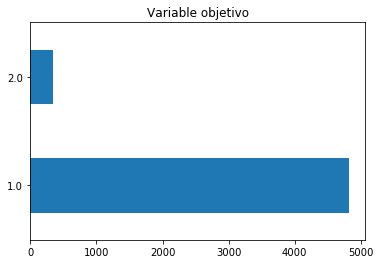

In [6]:
### Variable Objetivo ###
plot= new_df['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

In [13]:
new_df['P23'].value_counts()

1.0    4820
2.0     339
Name: P23, dtype: int64

In [7]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(new_df['P23'], new_df['P0R1'], margins=True)

P0R1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,All
P23,,,,,,,,,,,,,,,,,,,,
1.0,1023,150,146,129,254,63,215,173,509,563,83,315,633,153,72,225,44,37,33,4820
2.0,33,7,5,3,19,1,33,14,36,31,5,20,77,6,4,24,16,1,4,339
All,1056,157,151,132,273,64,248,187,545,594,88,335,710,159,76,249,60,38,37,5159


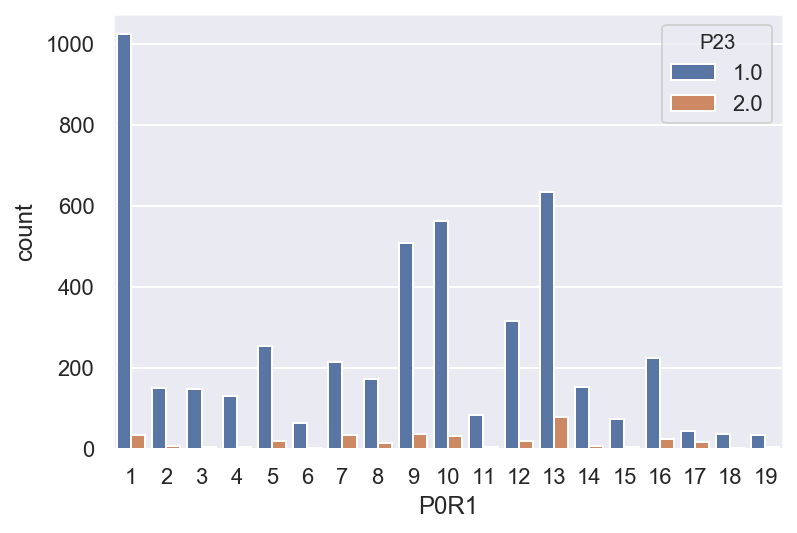

In [8]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=new_df);

In [9]:
new_df['P23'].unique()

array([1., 2.])

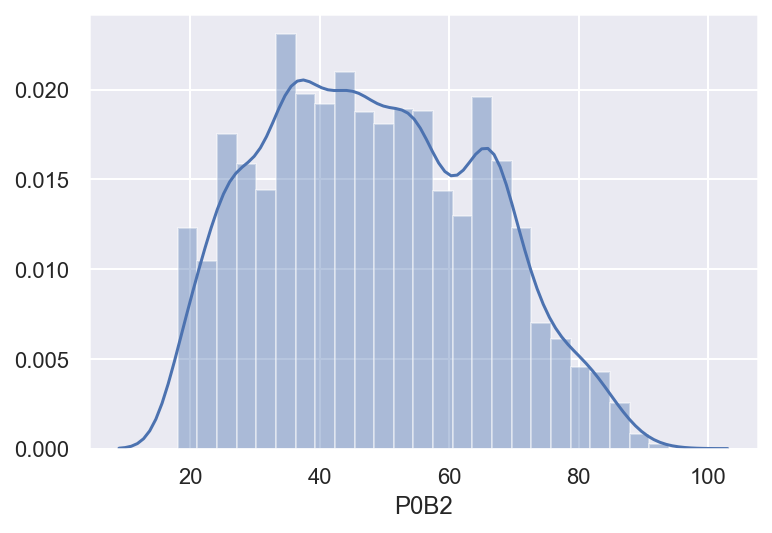

In [10]:
### Histograma de la edad ###
sns.distplot(new_df['P0B2'])

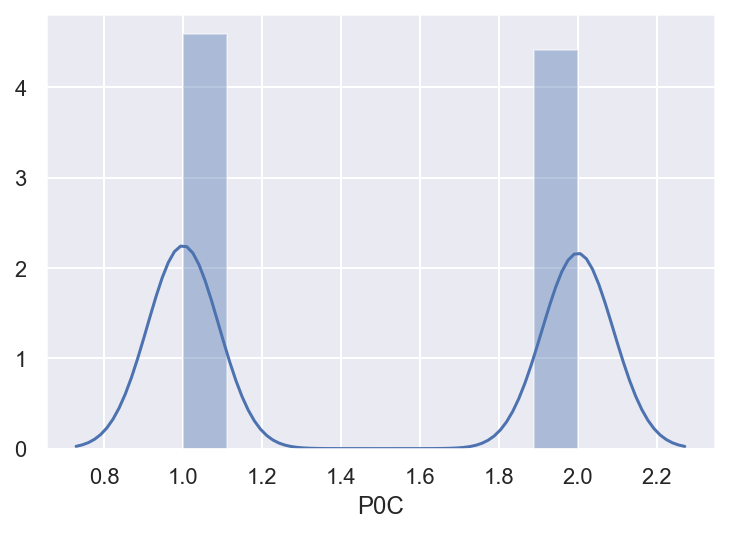

In [11]:
### Histograma del sexo ###
sns.distplot(new_df['P0C'])

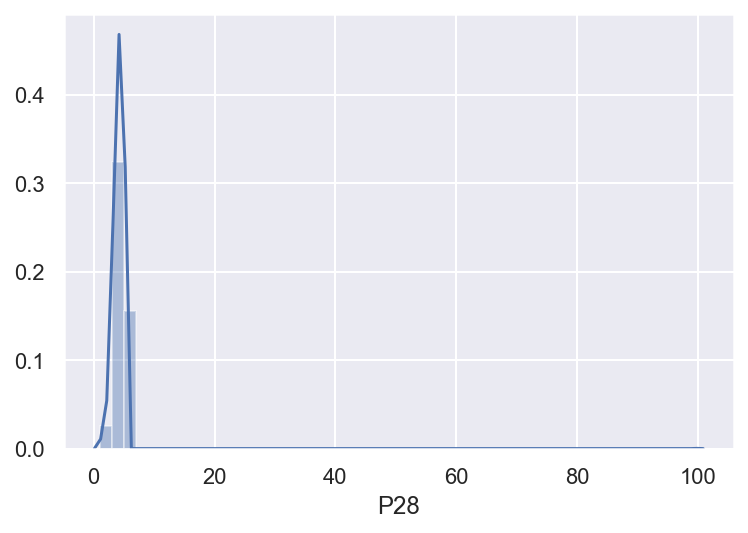

In [12]:
### Histograma Estado de Salud ###
sns.distplot(new_df['P28'])